In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is a dataset from 2014 survey about mental health that took place in tech workplace. Making sure that current environment in given workplace is free from factors that triggers mental health problems or the workers are mentally stable is crucial for organization. It affects many aspects of workers life and efficency in work that leads to much lesser productivity and workplace atmosphere.

The answers to this survey were given in fill in format so as opposite to checkboxes there are going to be many different forms of answers relating to same thing. Because of that, at the beggining I am going to replace some of these answers to typical types genders in order to ease analisys.

In [2]:
data = pd.read_csv('survey_mental_health.csv')
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


The description of the columns from the survey:
* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

In [3]:
data['Country'].value_counts().head(10)

United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

As we can see most of the survey participants are from United States. We cannot conclude that workers from some countries had more problems with mental health than other countries because of inequality of participants. This is why I will not include the country column. In addition I will also drop some other columns as they are not important or not used in further analysis.

In [4]:
df = data.drop(columns=['Timestamp', 'Country', 'state', 'remote_work', 'tech_company', 'wellness_program', 'anonymity', 
                        'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
                        'phys_health_interview','obs_consequence', 'comments'])
df.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,benefits,care_options,seek_help,leave,mental_vs_physical
0,37,Female,NaN,No,Yes,Often,6-25,Yes,Not sure,Yes,Somewhat easy,Yes
1,44,M,NaN,No,No,Rarely,More than 1000,Don't know,No,Don't know,Don't know,Don't know
2,32,Male,NaN,No,No,Rarely,6-25,No,No,No,Somewhat difficult,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,Somewhat difficult,No
4,31,Male,NaN,No,No,Never,100-500,Yes,No,Don't know,Don't know,Don't know


In [5]:
print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [6]:
df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)', 'woman',], 'Female', inplace=True)
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace=True)
df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace=True)
df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [18]:
all = len(df['Gender'])
print('Men: ', 991/all)
print('Female: ', 247/all)
print('Other: ', 21/all)

Men:  0.7871326449563145
Female:  0.19618745035742652
Other:  0.016679904686258934


Replacing different answers to gender question as there are many versions of given answers. In order to ease further statistics they are replaced by female, male and other categories. Afrer replacement we can see that around 79% of participants are male. It suggests us that there is a large inequality between number of male and female number of workers in tech industry. Additionally, declared other genders account for about 1.6% of surveyed participants.

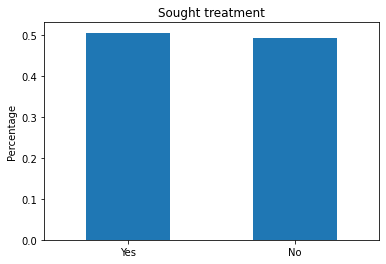

In [8]:
df['treatment'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Sought treatment')
plt.ylabel('Percentage')
plt.show()

Overall, around 50% of workers sought treatment for a mental health condition. That shows how common this problem is in current tech industry. To futher analyze percentages of different groups of workers we can diffrentiate workers by being self employed or not:

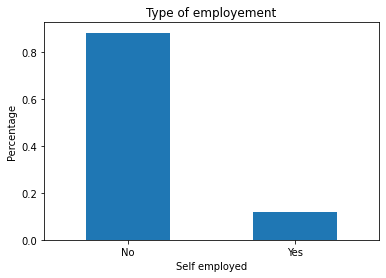

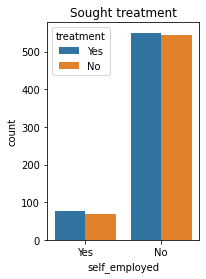

In [9]:
df['self_employed'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Type of employement')
plt.xlabel('Self employed')
plt.ylabel('Percentage')
plt.show()

plt.subplot(1,2,2)
sns.countplot(x='self_employed', hue='treatment', data=df)
plt.title('Sought treatment')
plt.show()

From these two plots we can see that most of survey participants belonged to workforce. Only around 10% were self employed. Interesting thing is that the percentages of people who sought treatment are the same for people that are self employed and not.

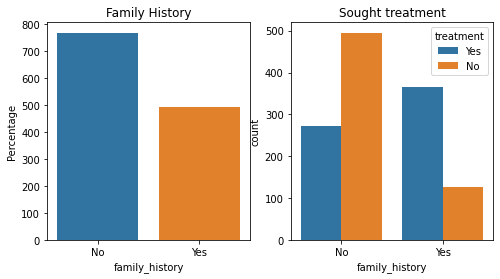

In [10]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
percentage_ = df['family_history'].value_counts().rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x='family_history', y='Percentage', data=percentage_)
plt.title('Family History')

plt.subplot(1,2,2)
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title('Sought treatment')
plt.show()

First plot shows that 40% of participants testified that they had a family history of mental illness. As they are more familiar about this kind of a problem, they are much more likely to seek treatment that participants that had no such history.

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

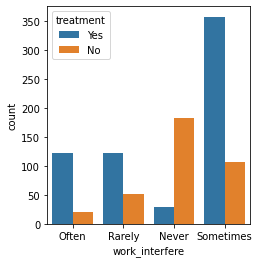

In [11]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,2)
sns.countplot(x='work_interfere', hue='treatment', data=df)

The plot above shows us the statistics of work interference for workers that had mental health problems and sought treatment or not. What is interesting that most of the participants chose the Sometimes and Often answers were people facing this problem and sought help. Iterestingly, there is a small group that chose Never answer and despite not having any work interference they prefered to seek treatment. 

Text(0, 0.5, '')

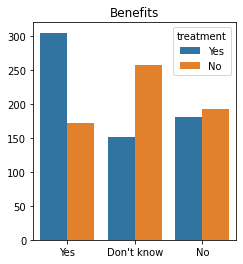

In [12]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,2)
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title('Benefits')
plt.xlabel('')
plt.ylabel('')

From this plot we can see that a large group of workers didn't even know whether they were provided mental health benefits. Also more concerning is that a decent group of people that sought treatment probably didn't think about their workplace as a place that could help them. In addition to that, close to half of workers that had no benefits were coping with mental health problems. On a better note, around 65% of workers that knew they were provided benefits sought treatment.

Text(0, 0.5, '')

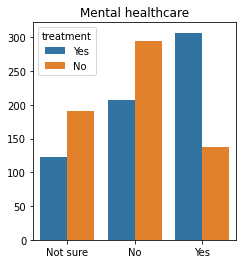

In [13]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,2)
sns.countplot(x='care_options', hue='treatment', data=df)
plt.title('Mental healthcare')
plt.xlabel('')
plt.ylabel('')

As we can see, around 70% of the workers that knew about provided mental healthcare sought treatment. This shows how important is providing mental health benefits and healthcare by employers. It makes a drastic increase in people that sought treatment in comparison to participants that answered Not sure or No.

<AxesSubplot:xlabel='leave', ylabel='count'>

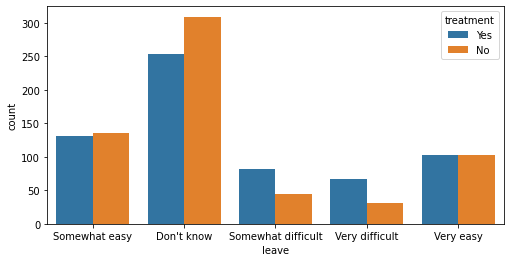

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,2)
sns.countplot(x='leave', hue='treatment', data=df)


As a most concerning fact is that there is around 20% group that thinks that taking medical leave for a mental health would be difficult. In addition, the largest group of participants didn't know whether it would be easy or not. Suprisingly around 45% of those participants sought treatment.

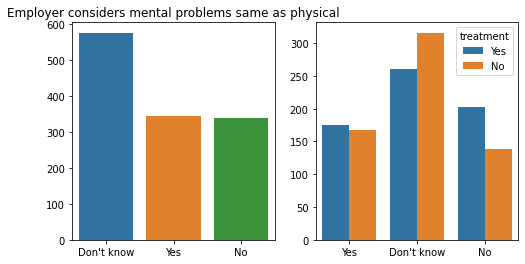

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
percentage_ = df['mental_vs_physical'].value_counts().rename_axis('mental_vs_physical').reset_index(name='Percentage')
sns.barplot(x='mental_vs_physical', y='Percentage', data=percentage_)
plt.xlabel('')
plt.ylabel('')
plt.title('Employer considers mental problems same as physical')

plt.subplot(1,2,2)
sns.countplot(x='mental_vs_physical', hue='treatment', data=df)
plt.xlabel('')
plt.ylabel('')
plt.show()

What is interesting that there is equal amount of participants who answered Yes or No whether their empoyer considers mental health problems same as physical ones. What is important to point out is the disparity between workers that sought treatment and not when their employer didn't consider these problems the same.